### САМОСТОЯТЕЛЬНАЯ РАБОТА №2 (одномерный случай)
### Интервальная оценка параметров распределения, доверительные интервалы

In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
from numpy import random
from random import normalvariate
from scipy.integrate import quad
from scipy import stats

In [2]:
a = 4
b = 11
a, b

(4, 11)

Мат. ожидание и среднеквадратичное отклонение.

In [3]:
mu = a * b
sigma = a + b
mu, sigma

(44, 15)

## №1.

Вероятность попадания нормально распределенной случайной величины с математическим ожиданием mu и среднеквадратическим отклонением sigma в интервал [20, 30].

In [4]:
interval = [20, 30]

In [5]:
def _f_(t):
    return math.exp(- t * t / 2)

def _Laplace_function_(x):
    integral = quad(_f_, 0, x)
    return (1 / math.sqrt(2 * math.pi)) * integral[0]

def _argument_of_Laplace_function_(interval_bound, mu, sigma):
    return (interval_bound - mu) / sigma

def _probability_of_falling_into_the_interval_(interval, mu, sigma):
    x1 = _argument_of_Laplace_function_(interval[1], mu, sigma)
    x2 = _argument_of_Laplace_function_(interval[0], mu, sigma)
    return _Laplace_function_(x1) - _Laplace_function_(x2)

In [10]:
general_sample_probability = _probability_of_falling_into_the_interval_(interval, mu, sigma)
general_sample_probability

0.12052465315267152

Функция распределения нормальной случайной величины на границе интервала.

In [11]:
def _density_(x):
    return math.exp(- 0.5 * ((x - mu) / sigma) ** 2) / sigma / math.sqrt(2 * math.pi)

def _distribution_function_(interval_bound):
    return quad(_density_, -math.inf, interval_bound)

In [12]:
distribution_function = _distribution_function_(interval[1])[0]
distribution_function

0.17532394485222846

In [55]:
distribution_function_2 = _distribution_function_(interval[0])[0]
distribution_function_2

0.05479929169955802

## №2.

Выборка из генеральной совокупности с нормальным распределением объема 100.

In [78]:
main_sample_size = 100
main_sample = random.normal(mu, sigma, size = main_sample_size)
main_sample

array([20.16709608, 46.96672105, 49.97223902, 44.63497058, 52.61661526,
       52.76695609, 32.54103622, 58.09170098, 24.50491216, 57.01136347,
       31.10548308, 44.87194475, 54.30541518, 16.904374  , 63.2267466 ,
       54.16910424, 61.20862852, 21.11394285, 46.5747834 , 47.97576956,
       21.32254862, 45.20400461, 30.36817541, 64.20982248, 33.54112595,
       37.39052261, 56.24077019, 44.14245181, 62.88959233, 50.2306502 ,
       33.2395139 , 62.57042351, 23.82842974, 37.01768955, 47.64492859,
       44.81561003, 42.66842196, 48.61154354, 19.20778436, 40.49372076,
       48.4435058 , 39.7845145 , 40.93025025, 42.31227899, 29.46245324,
       44.71137391, 54.77091551, 48.69249222, 55.36444108, 34.5662731 ,
       40.35264413, 52.32254679, 16.89133686, 56.30802908, 17.28411186,
       71.96164145, 66.13943097, 31.94726428, 49.25000633, 43.01201367,
       63.85125494, 33.38757181, 56.50122459, 42.48943346, 37.9591388 ,
       25.95637456, 44.18392536, 63.27034704, 52.83185893, 24.94

<BarContainer object of 100 artists>

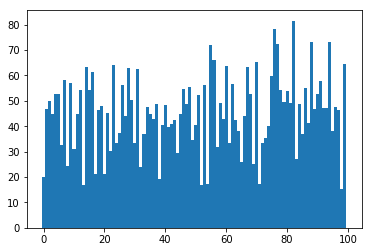

In [79]:
plt.bar([i for i in range(0, len(main_sample))], main_sample, 1)

## №3.

Первая случайная выборка объемом 15 значений из полученной выборочной совокупности. 

In [15]:
small_sample_size = 15
sample_1 = random.choice(main_sample, size = small_sample_size)
sample_1

array([33.03323464, 40.44781965, 27.87122782, 20.64371937, 59.85528927,
       48.64606528, 20.5712568 , 35.13560823, 61.98935137, 59.85528927,
       93.47336947, 20.5712568 , 25.31764258, 34.57066087, 75.80327977])

<BarContainer object of 15 artists>

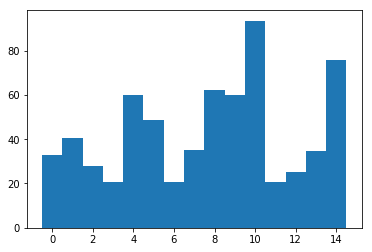

In [16]:
plt.bar([i for i in range(0, len(sample_1))], sample_1, 1)

Вторая случайная выборка объемом 15 значений из полученной выборочной совокупности. 

In [17]:
sample_2 = random.choice(main_sample, size = small_sample_size)
sample_2

array([47.40535973, 27.87122782, 15.76203363, 38.50977853, 66.76149736,
       75.80327977, 18.53760269, 41.68532788, 46.51103337, 49.49682758,
       27.7187112 , 19.25432959, 46.32114363, 40.79282796, 29.31255661])

<BarContainer object of 15 artists>

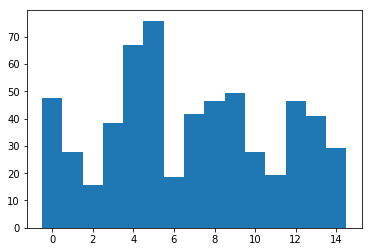

In [18]:
plt.bar([i for i in range(0, len(sample_2))], sample_2, 1)

Вероятность (относительная частота) попадания в интервал [20, 30] для основной выборки и двух полученных из нее выборок. 

In [19]:
def _relative_frequency_of_falling_into_the_interval_(sample, interval):
    sample_frequency = 0
    for i in range(len(sample)):
        if sample[i] >= interval[0] and sample[i] <= interval[1]:
            sample_frequency += 1
    return sample_frequency / len(sample)

In [20]:
main_sample_probability = _relative_frequency_of_falling_into_the_interval_(main_sample, interval)
main_sample_probability

0.13

In [21]:
sample_1_probability = _relative_frequency_of_falling_into_the_interval_(sample_1, interval)
sample_1_probability

0.3333333333333333

In [22]:
sample_2_probability = _relative_frequency_of_falling_into_the_interval_(sample_2, interval)
sample_2_probability

0.2

Сравнение полученных 4 вероятностей (для генеральной совокупности и 3 выборок). 

In [23]:
print("general_sample_probability = ", general_sample_probability)
print("main_sample_probability = ", main_sample_probability)
print("sample_1_probability = ", sample_1_probability)
print("sample_2_probability = ", sample_2_probability)

general_sample_probability =  0.12052465315267152
main_sample_probability =  0.13
sample_1_probability =  0.3333333333333333
sample_2_probability =  0.2


<BarContainer object of 4 artists>

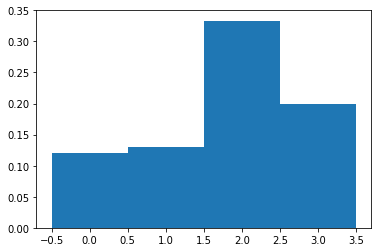

In [24]:
plt.bar([i for i in range(0, 4)], 
        [general_sample_probability, main_sample_probability, sample_1_probability, sample_2_probability], 1)

## №4.

Точечные оценки параметров распределения для двух маленьких выборок.

In [25]:
sample_1.sort()
sample_1

array([20.5712568 , 20.5712568 , 20.64371937, 25.31764258, 27.87122782,
       33.03323464, 34.57066087, 35.13560823, 40.44781965, 48.64606528,
       59.85528927, 59.85528927, 61.98935137, 75.80327977, 93.47336947])

In [26]:
sample_2.sort()
sample_2

array([15.76203363, 18.53760269, 19.25432959, 27.7187112 , 27.87122782,
       29.31255661, 38.50977853, 40.79282796, 41.68532788, 46.32114363,
       46.51103337, 47.40535973, 49.49682758, 66.76149736, 75.80327977])

Выборочное среднее.

In [27]:
# np.mean(sample)

def _sample_mean_(sample):
    return sum(sample) / len(sample)

In [28]:
sample_1_mean = _sample_mean_(sample_1)
sample_1_mean

43.8523380786975

In [29]:
sample_2_mean = _sample_mean_(sample_2)
sample_2_mean

39.449569157133084

Выборочная дисперсия (несмещенная).

In [30]:
def _unbiased_dispersion_(sample):
    s = 0
    sample_mean = _sample_mean_(sample)
    for i in sample:
        s += (i - sample_mean) ** 2
    return s / (len(sample) - 1)

In [31]:
sample_1_unbiased_dispersion = _unbiased_dispersion_(sample_1)
sample_1_unbiased_dispersion

489.9708820100723

In [32]:
sample_2_unbiased_dispersion = _unbiased_dispersion_(sample_2)
sample_2_unbiased_dispersion

294.08800749260837

Выборочное среднее квадратическое отклонение (несмещенное). 

In [33]:
# stats.sem(sample)

def _unbiased_standard_deviation_(sample):
    unbiased_dispersion = _unbiased_dispersion_(sample)
    return unbiased_dispersion ** (1 / 2)

In [34]:
sample_1_unbiased_standard_deviation = _unbiased_standard_deviation_(sample_1)
sample_1_unbiased_standard_deviation

22.13528590305696

In [35]:
sample_2_unbiased_standard_deviation = _unbiased_standard_deviation_(sample_2)
sample_2_unbiased_standard_deviation

17.14899435805518

## №5.

Ошибки оценки параметров.

In [36]:
def _mu_estimation_error_(sample):
    sample_mean = _sample_mean_(sample)
    return mu - sample_mean

In [37]:
sample_1_mu_estimation_error = _mu_estimation_error_(sample_1)
sample_1_mu_estimation_error

0.14766192130250033

In [38]:
sample_2_mu_estimation_error = _mu_estimation_error_(sample_2)
sample_2_mu_estimation_error

4.550430842866916

In [39]:
def _sigma_estimation_error_(sample):
    sample_unbiased_standard_deviation = _unbiased_standard_deviation_(sample)
    return sigma - sample_unbiased_standard_deviation

In [40]:
sample_1_sigma_estimation_error = _sigma_estimation_error_(sample_1)
sample_1_sigma_estimation_error

-7.13528590305696

In [41]:
sample_2_sigma_estimation_error = _sigma_estimation_error_(sample_2)
sample_2_sigma_estimation_error

-2.1489943580551802

## №6.

t - обратное значение стандартного нормального распределения. 

In [60]:
gamma = 0.975
t_norm = stats.norm.ppf(q = 1 - gamma)
t_norm

-1.959963984540054

Доверительный интервал для оценки неизвестного мат. ожидания с уровнем доверия 0.95 при известном
среднем квадратическом отклонении генеральной совокупности, которое равно sigma.

In [61]:
def _confidence_interval_with_sigma_(sample):
    t = stats.norm.ppf(q = gamma)
    s = sigma
    interval = t * (s / np.sqrt(len(sample)))
    sample_mean = _sample_mean_(sample)
    return (sample_mean - interval, sample_mean + interval)

In [62]:
main_sample_confidence_interval_with_sigma = _confidence_interval_with_sigma_(main_sample)
mu, main_sample_confidence_interval_with_sigma

(44, (40.7995385574607, 46.67943051108086))

## №7.

t  находится по заданному значению уровня доверия 0,95 по распределению Стьюдента для n-1 степеней свободы.

In [63]:
t_stud = stats.t.ppf((1 + gamma) / 2., len(sample_1) - 1)
t_stud

2.5095694114796663

Доверительный интервал для оценки мат. ожидания при неизвестном значении генерального среднего квадратического отклонения, где s - среднее квадратическое отклонение, вычисленное по несмещенной выборочной дисперсии.

In [64]:
def _confidence_interval_stud_(sample):
    t = stats.t.ppf((1 + gamma) / 2., len(sample) - 1)
    s = _unbiased_standard_deviation_(sample)
    interval = t * (s / np.sqrt(len(sample)))
    sample_mean = _sample_mean_(sample)
    return (sample_mean - interval, sample_mean + interval)

In [65]:
main_sample_confidence_interval_stud = _confidence_interval_stud_(main_sample)
mu, main_sample_confidence_interval_stud

(44, (39.834515465707604, 47.644453602833956))

## №8.

t1 и t2 - находятся по заданному значению уровня доверия 0,95 по таблице распределения Пирсона хи-квадрат для  n-1 степеней свободы.

In [80]:
t_pirs_1 = stats.chi2.ppf(1 - gamma, len(sample_1) - 1)
t_pirs_1

5.628726103039734

In [81]:
t_pirs_2 = stats.chi2.ppf(gamma, len(sample_1) - 1)
t_pirs_2

26.11894804503737

Доверительный интервал с уровнем доверия 0,95 для дисперсии при неизвестном значении генерального среднего, где s - среднее квадратическое отклонение, вычисленное по несмещенной выборочной дисперсии.

In [82]:
def _confidence_interval_for_sigma_squared_(sample):
    t_1 = stats.chi2.ppf(1 - gamma, len(sample) - 1)
    t_2 = stats.chi2.ppf(gamma, len(sample) - 1)
    s = _unbiased_standard_deviation_(sample)
    interval = (len(sample) - 1) * s * s
    return (interval / t_2, interval / t_1)

In [83]:
main_sample_confidence_interval_for_sigma_squared = _confidence_interval_for_sigma_squared_(main_sample)
sigma * sigma, main_sample_confidence_interval_for_sigma_squared

(225, (169.33630678717915, 296.4310941238944))

Доверительный интервал с уровнем доверия 0,95 для генерального среднего квадратического отклонения, где s - среднее квадратическое отклонение, вычисленное по несмещенной выборочной дисперсии.

In [84]:
def _confidence_interval_for_sigma_(sample):
    t_1 = stats.chi2.ppf(1 - gamma, len(sample) - 1)
    t_2 = stats.chi2.ppf(gamma, len(sample) - 1)
    s = _unbiased_standard_deviation_(sample)
    interval = np.sqrt(len(sample) - 1) * s 
    return (interval / np.sqrt(t_2), interval / np.sqrt(t_1))

In [85]:
main_sample_confidence_interval_for_sigma = _confidence_interval_for_sigma_(main_sample)
sigma, main_sample_confidence_interval_for_sigma

(15, (13.01292844778527, 17.217174394304497))